<a href="https://colab.research.google.com/github/RizwanMunawar/Cats-Vs-Dogs-Classification-CNN-Data-Augmentation/blob/master/Cats_vs_dogs_classification_using_data_augmentation_and_deep_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

###### Importing Libraries

In [ ]:
import os
import time
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from google.colab import drive
from keras.models import load_model
from keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator

###### Mounting Drive

In [ ]:
 drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install streamlit
!pip install streamlit_lottie


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 43.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.0/190.0 kB 9.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 87.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 802.4/802.4 kB 6.0 MB/s eta 0:00:00


In [ ]:
import streamlit as st


import pandas as pd
import plotly.graph_objects as go
import altair as alt
import plotly.express as px
from streamlit_lottie import st_lottie
import requests

In [ ]:
import pandas as pd

# Read the CSV file into a pandas.DataFrame object
df = pd.read_csv("/content/drive/MyDrive/cybernauts/classification/classification/Data/solar_wind.csv")

# Print the DataFrame
print(df)


          period           timedelta  bx_gse  by_gse  bz_gse  theta_gse  \
0        train_a     0 days 00:00:00   -5.55    3.00    1.25      11.09   
1        train_a     0 days 00:01:00   -5.58    3.16    1.17      10.10   
2        train_a     0 days 00:02:00   -5.15    3.66    0.85       7.87   
3        train_a     0 days 00:03:00   -5.20    3.68    0.68       6.17   
4        train_a     0 days 00:04:00   -5.12    3.68    0.49       4.62   
...          ...                 ...     ...     ...     ...        ...   
8392315  train_c  2435 days 23:55:00   -1.18    2.00   -3.92     -59.28   
8392316  train_c  2435 days 23:56:00   -1.34    2.12   -3.83     -56.78   
8392317  train_c  2435 days 23:57:00   -1.62    2.33   -3.63     -51.98   
8392318  train_c  2435 days 23:58:00   -2.27    2.48   -3.22     -43.81   
8392319  train_c  2435 days 23:59:00   -2.15    2.41   -3.30     -45.55   

         phi_gse  bx_gsm  by_gsm  bz_gsm  theta_gsm  phi_gsm    bt  density  \
0         153.37   -

In [ ]:
 import pandas as pd

# Read the CSV file into a pandas.DataFrame object
df = pd.read_csv("/content/drive/MyDrive/cybernauts/classification/classification/Data/solar_wind.csv")

# Access the name column
name_column = df["bx_gse"]

# Pass the column to the x= argument of the go.Scatter() function
fig = go.Figure(data=[go.Scatter(x=name_column, y=[1, 2, 3])])


In [ ]:
def Graph_of_Discharge_Ratio():
    fig = go.Figure()

    # Read the CSV file into a pandas.DataFrame object
    df = pd.read_csv("/content/drive/MyDrive/cybernauts/classification/classification/Data/solar_wind.csv")

    # Access the bx_gse column
    bx_gse_column = df["bx_gse"]

    # Pass the column to the x= argument of the go.Scatter() function
    fig.add_trace(go.Scatter(x=bx_gse_column, y=df['timedelta'], name="States"))
    fig.add_trace(go.Scatter(x=df['by_gse'], y=df['timedelta'], name="Discharge Ratio"))

    fig.update_layout(title={ 'font': { 'size': 25}})
    fig.layout.update(
        title_text='Discharge Ratio by State', xaxis_rangeslider_visible=True, xaxis_rangeslider_thickness=0.05)
    fig.update_layout(height=500, width=1000)
    fig.update_traces(line=dict(color='red'))

    st.plotly_chart(fig, use_container_width=False, use_container_height=False)
Graph_of_Discharge_Ratio()


2023-10-08 15:06:19.803 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]


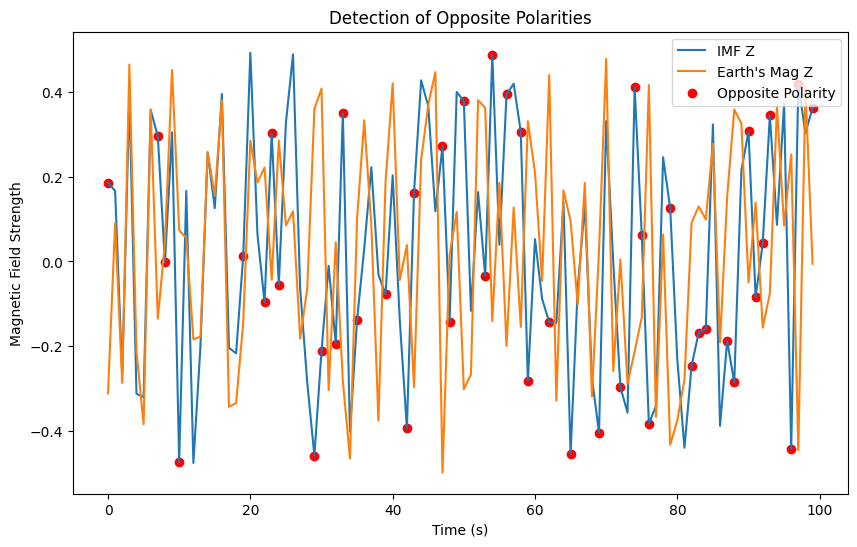

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
timestamps = np.arange(0, 100, 1)  # Time in seconds
IMF_Z = np.random.rand(len(timestamps)) - 0.5  # Random IMF Z component (-0.5 to 0.5)
Earth_Mag_Z = np.random.rand(len(timestamps)) - 0.5  # Random Earth's magnetic field Z component (-0.5 to 0.5)

# Detect intervals with opposite polarities
opposite_polarity_intervals = np.where(np.sign(IMF_Z) != np.sign(Earth_Mag_Z))

# Plot the data and highlight intervals with opposite polarities
plt.figure(figsize=(10, 6))
plt.plot(timestamps, IMF_Z, label='IMF Z')
plt.plot(timestamps, Earth_Mag_Z, label="Earth's Mag Z")
plt.scatter(timestamps[opposite_polarity_intervals], IMF_Z[opposite_polarity_intervals], color='red', label='Opposite Polarity')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field Strength')
plt.legend()
plt.title('Detection of Opposite Polarities')
plt.show()

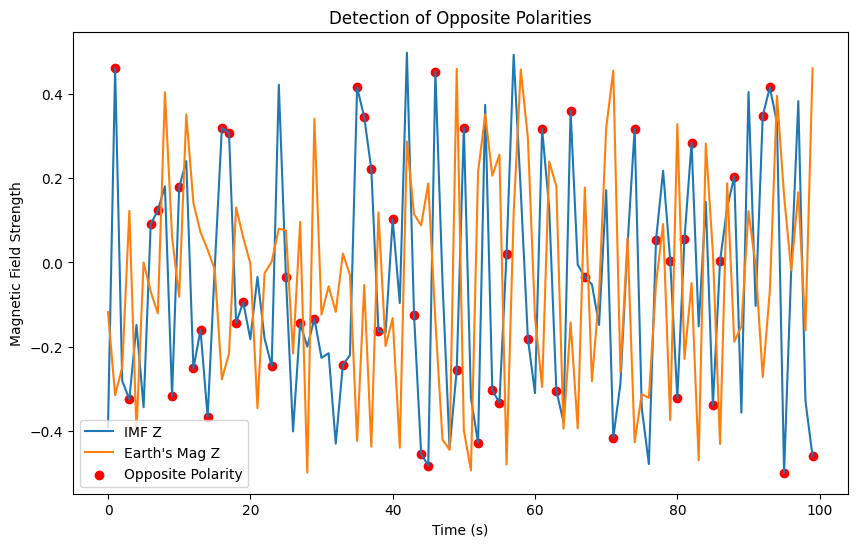

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Sample data (replace with your actual data)
timestamps = np.arange(0, 100, 1)  # Time in seconds
IMF_Z = np.random.rand(len(timestamps)) - 0.5  # Random IMF Z component (-0.5 to 0.5)
Earth_Mag_Z = np.random.rand(len(timestamps)) - 0.5  # Random Earth's magnetic field Z component (-0.5 to 0.5)

# Detect intervals with opposite polarities
opposite_polarity_intervals = np.where(np.sign(IMF_Z) != np.sign(Earth_Mag_Z))

# Plot the data and highlight intervals with opposite polarities
plt.figure(figsize=(10, 6))
plt.plot(timestamps, IMF_Z, label='IMF Z')
plt.plot(timestamps, Earth_Mag_Z, label="Earth's Mag Z")
plt.scatter(timestamps[opposite_polarity_intervals], IMF_Z[opposite_polarity_intervals], color='red', label='Opposite Polarity')
plt.xlabel('Time (s)')
plt.ylabel('Magnetic Field Strength')
plt.legend()
plt.title('Detection of Opposite Polarities')
plt.show()

In [ ]:
import pandas as pd

# Load data from a CSV file (replace 'your_data.csv' with your actual file path)
data = pd.read_csv('/content/drive/MyDrive/cybernauts/classification/classification/Data/solar_wind.csv')

# Extract the columns for IMF and Earth's magnetic field components
X_IMF = data['bx_gsm']
Y_IMF = data['by_gsm']
Z_IMF = data['bz_gsm']

X_Earth = data['bx_gse']
Y_Earth = data['by_gse']
Z_Earth = data['bz_gse']

# Initialize counter for magnetic reconnection events
magnetic_reconnection_count = 0

# Time tolerance in seconds (can be adjusted based on your data)
time_tolerance = 1

# Loop through data points to find instances of opposite polarities in the Z component
num_data_points = len(data)

for i in range(num_data_points):

    # Check for opposite polarities in Z component
    if Z_IMF[i] * Z_Earth[i] < 0:

        # Check if the condition persists within the time_tolerance
        if i + time_tolerance < num_data_points and Z_IMF[i + time_tolerance] * Z_Earth[i + time_tolerance] < 0:

            # You could add further checks here for other conditions, involving X, Y components
            # Example: Check if X_IMF and X_Earth align in some specific way when Z components are opposite

            # Increase counter for magnetic reconnection events
            magnetic_reconnection_count += 1

# Calculate frequency of potential magnetic reconnection events
frequency = magnetic_reconnection_count / num_data_points

print(f"Potential magnetic reconnection events occurred with a frequency of {frequency}")


Potential magnetic reconnection events occurred with a frequency of 0.07752385514375047


In [ ]:
import random
import numpy as np

# Generate synthetic data (replace this with actual data)
num_data_points = 1000
X_IMF = np.random.uniform(-10, 10, num_data_points)
Y_IMF = np.random.uniform(-10, 10, num_data_points)
Z_IMF = np.random.uniform(-10, 10, num_data_points)

X_Earth = np.random.uniform(-10, 10, num_data_points)
Y_Earth = np.random.uniform(-10, 10, num_data_points)
Z_Earth = np.random.uniform(-10, 10, num_data_points)

# Initialize counter for magnetic reconnection events
magnetic_reconnection_count = 0

# Time tolerance in seconds (can be adjusted based on real-world data)
time_tolerance = 1

# Loop through data points to find instances of opposite polarities in the Z component
for i in range(num_data_points):


    # Check for opposite polarities in Z component
    if Z_IMF[i] * Z_Earth[i] < 0:

        # Check if the condition persists within the time_tolerance
        if i + time_tolerance < num_data_points and Z_IMF[i + time_tolerance] * Z_Earth[i + time_tolerance] < 0:

            # You could add further checks here for other conditions, involving X, Y components
            # Example: Check if X_IMF and X_Earth align in some specific way when Z components are opposite

            # Increase counter for magnetic reconnection events
            magnetic_reconnection_count += 1

# Calculate frequency of potential magnetic reconnection events
frequency = magnetic_reconnection_count / num_data_points

print(f"Potential magnetic reconnection events occurred with a frequency of {frequency}")


Potential magnetic reconnection events occurred with a frequency of 0.222


In [ ]:

# Generate synthetic data (replace this with actual data)
num_data_points = 1000
Z_IMF = np.random.uniform(-10, 10, num_data_points)
Z_Earth = np.random.uniform(-10, 10, num_data_points)

# Initialize counter for magnetic reconnection events
magnetic_reconnection_count = 0

# Time tolerance in seconds (can be adjusted based on real-world data)
time_tolerance = 1

# Loop through data points to find instances of opposite polarities
for i in range(num_data_points):

    # Check for opposite polarities
    if Z_IMF[i] * Z_Earth[i] < 0:

        # Assuming time-aligned data; check if the condition persists within the time_tolerance
        # For demonstration, assuming time_tolerance=1 corresponds to 1 data point
        if i + time_tolerance < num_data_points and Z_IMF[i + time_tolerance] * Z_Earth[i + time_tolerance] < 0:

            # Increase counter for magnetic reconnection events
            magnetic_reconnection_count += 1

# Calculate frequency of potential magnetic reconnection events
frequency = magnetic_reconnection_count / num_data_points

print(f"Potential magnetic reconnection events occurred with a frequency of {frequency}")


In [ ]:
X = data[['bx_gse', 'by_gse', 'bz_gse']]  # Features
y = data['timedelta']  # Target variable

# 3. Split Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 4. Normalize Data
scaler_X = StandardScaler().fit(X_train)
X_train_scaled = scaler_X.transform(X_train)
X_test_scaled = scaler_X.transform(X_test)

# 5. Model Training
model = SVR()
model.fit(X_train_scaled, y_train)

# 6. Model Evaluation
predictions = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

# 7. (Optional) Hyperparameter Tuning - may use GridSearchCV or RandomizedSearchCV

# 8. Make Predictions
# Use `model.predict(input_data)` to make predictions on new data


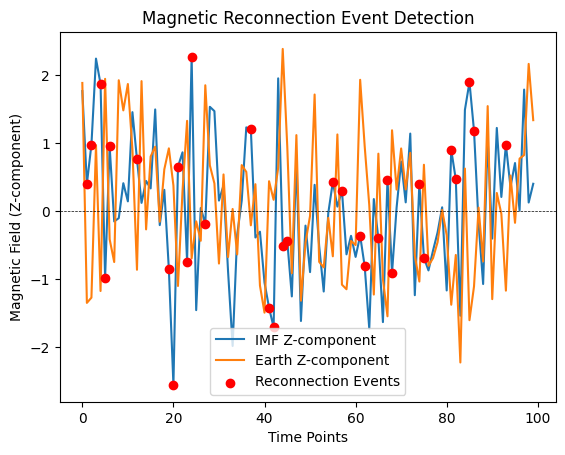

In [ ]:
# Generate synthetic data
np.random.seed(0)  # For reproducibility
time_points = np.arange(0, 100, 1)  # Representing 100 time points
imf_z = np.random.normal(0, 1, 100)  # Simulating the Z component of IMF
earth_z = np.random.normal(0, 1, 100)  # Simulating the Z component of Earth's magnetic field

# Event Detection Function
def detect_magnetic_reconnection(imf_z, earth_z, threshold=0.5):
    # Placeholder for detected events
    events = []

    # Loop through the data points and detect reconnection events
    for i, (z_imf, z_earth) in enumerate(zip(imf_z, earth_z)):
        # Condition for magnetic reconnection
        if z_imf * z_earth < -threshold**2:
            events.append(i)

    return events

# Detect magnetic reconnection events
events = detect_magnetic_reconnection(imf_z, earth_z)

# Visualization
plt.plot(time_points, imf_z, label='IMF Z-component')
plt.plot(time_points, earth_z, label='Earth Z-component')
plt.scatter(events, [imf_z[i] for i in events], color='red', zorder=5, label='Reconnection Events')
plt.title('Magnetic Reconnection Event Detection')
plt.xlabel('Time Points')
plt.ylabel('Magnetic Field (Z-component)')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load the dataset
# Assume the CSV file has columns: time, imf_z, earth_z
# Example:
# time,imf_z,earth_z
# 0,0.5,0.6
# 1,-0.3,0.4
# 2,0.7,-0.7
# ...

data = pd.read_csv('/content/drive/MyDrive/cybernauts/classification/classification/Data/solar_wind.csv')

# Extract relevant columns
time_points = data['timedelta']
imf_z = data['bz_gsm']
earth_z = data['bz_gse']

# Event Detection Function
def detect_magnetic_reconnection(imf_z, earth_z, threshold=0.5):
    # Placeholder for detected events
    events = []

    # Loop through the data points and detect reconnection events
    for i, (z_imf, z_earth) in enumerate(zip(imf_z, earth_z)):
        # Condition for magnetic reconnection
        if z_imf * z_earth < -threshold**2:
            events.append(i)

    return events

# Detect magnetic reconnection events
events = detect_magnetic_reconnection(imf_z, earth_z)

# Visualization
plt.plot(time_points, imf_z, label='IMF Z-component')
plt.plot(time_points, earth_z, label='Earth Z-component')
plt.scatter([time_points[i] for i in events], [imf_z[i] for i in events], color='red', zorder=5, label='Reconnection Events')
plt.title('Magnetic Reconnection Event Detection')
plt.xlabel('Time Points')
plt.ylabel('Magnetic Field (Z-component)')
plt.axhline(y=0, color='k', linestyle='--', linewidth=0.5)
plt.legend()
plt.show()


###### Pre-Processing for testing and validation data

In [ ]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=validation_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

image_gen_test = ImageDataGenerator(rescale=1./255)

test_data_gen = image_gen_test.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory=test_dir,
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 710 images belonging to 2 classes.
Found 604 images belonging to 2 classes.


In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    tf.keras.layers.Dropout(0.6),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
])

##### Defining Model Parameters

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

###### Checking Model parameters details

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

###### Let's Start Training

In [ ]:
epochs=100
history = model.fit(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_validation / float(BATCH_SIZE))),
    verbose= 1
)

Epoch 1/100
15/15 [==============================] - 87s 6s/step - loss: 0.7287 - accuracy: 0.5035 - val_loss: 0.6941 - val_accuracy: 0.4958
Epoch 2/100
15/15 [==============================] - 87s 6s/step - loss: 0.6941 - accuracy: 0.5012 - val_loss: 0.6920 - val_accuracy: 0.5662
Epoch 3/100
15/15 [==============================] - 86s 6s/step - loss: 0.6921 - accuracy: 0.5071 - val_loss: 0.7034 - val_accuracy: 0.4958
Epoch 4/100
15/15 [==============================] - 86s 6s/step - loss: 0.6942 - accuracy: 0.5224 - val_loss: 0.6908 - val_accuracy: 0.4958
Epoch 5/100
15/15 [==============================] - 86s 6s/step - loss: 0.6894 - accuracy: 0.5218 - val_loss: 0.6884 - val_accuracy: 0.5169
Epoch 6/100
15/15 [==============================] - 86s 6s/step - loss: 0.6828 - accuracy: 0.5559 - val_loss: 0.6978 - val_accuracy: 0.5676
Epoch 7/100
15/15 [==============================] - 86s 6s/step - loss: 0.6903 - accuracy: 0.5876 - val_loss: 0.6848 - val_accuracy: 0.5761
Epoch 8/100
1

###### Visualization of validation-Training (Accuracy and Loss)

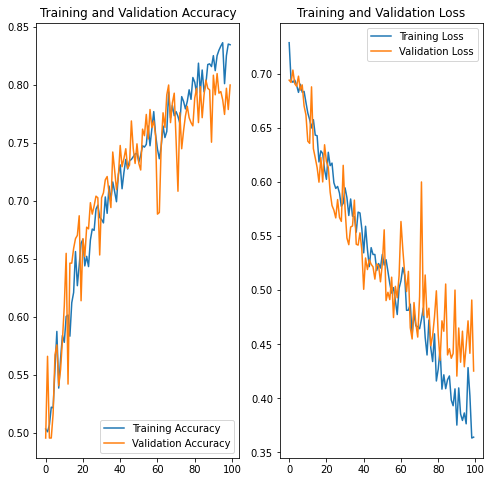

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

###### Testing model

In [ ]:
results = model.evaluate(test_data_gen)
print("test_loss, test accuracy",results)

6/6 [==============================] - 7s 1s/step - loss: 0.4216 - accuracy: 0.7980
test_loss, test accuracy [0.42155420780181885, 0.7980132699012756]
